## 18.2 Weighted graphs

The next examples of greedy algorithms will be on a new kind of graph,
which this section introduces.

A graph shows which pairs of entities are related.
Often we want to quantify the relationships, e.g.
how long it takes or how much it costs to travel from A to B.

In a **weighted** graph, each edge has an associated number: its **weight**.
The weight can represent distance, cost, duration, or anything else that's
relevant for the model. For example, a weighted social network could represent
the strengths of friendships. This is not asked of users, as it's unreliable
and can be awkward, e.g. if Alice rates her friendship with Bob as 9 but Bob
only rates it as 7. I imagine social media companies have their own secret
friendship strength measure, e.g. based on mutual likes and posts, and use it
to tailor recommendations, order the news feed, and in other features.

Edge weights can be any floating point number or integer, but examples will use
mostly small integers. Depending on the problem and algorithm, there may be some
restrictions, e.g. the weights must be positive or within a certain range.

For unweighted graphs, a shortest path between two nodes is a path with
the fewest edges.
For weighted graphs, a **shortest path** has the lowest sum of edge weights.
For some reason, the term 'lightest path' hasn't caught on&nbsp;...

Sometimes the weights aren't given in the problem and must be computed instead.
For example, if nodes represent *x*–*y* points in a 2D space,
the weights are usually some form of distance between them.

In the next figure, the **Manhattan distance** ('as the taxi drives')
between two points is $m = m_x + m_y$
and the **Euclidean distance** ('as the crow flies')
is obtained through the Pythagorean theorem:
$e = \sqrt{m_x² + m_y²}$.

<p id="fig-18.2.1"></p>

*[Figure 18.2.1](../33_Figures/Figures_18_2.ipynb#Figure-18.2.1)*

![Image 18_2_distances.png](18_2_distances.png)

More generally, for any two points `(x1, y1)` and `(x2, y2)` represented with
Python tuples:

- the Manhattan distance is `abs(x1 - x2) + abs(y1 - y2)`
- the Euclidean distance is `math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)`.

The Python function `abs` returns the absolute value of an expression: if
the value is negative, it returns its negation, otherwise it returns the value.
For example, `abs(-5)` and `abs(5)` both return 5.
The absolute value is necessary for the Manhattan distance from A to B to be
the same as from B to A.

Weighted graphs can be directed or undirected.
You've seen the undirected weighted graph below when I introduced the
[travelling salesman problem](../11_Search/11_4_permutations.ipynb#11.4.1-Problem) (TSP):
given a set of places and the costs of travelling between any two places,
find a lowest-cost tour that visits all places once and returns to the start.
Remember that for optimisation problems 'cost' is a generic term for
the quantity being optimised: for the TSP it could be travel time or distance.

<p id="fig-18.2.2"></p>

*[Figure 18.2.2](../33_Figures/Figures_18_2.ipynb#Figure-18.2.2)*

![Image ../11_Search/11_4_tsp.png](../11_Search/11_4_tsp.png)

Now that you know about some
[basic graph concepts](../17_Graphs_1/17_2_concepts.ipynb#17.2.2-On-graphs),
we can define the TSP as a graph problem.
The TSP is the optimisation problem of finding a shortest path that is a tour
for a given undirected weighted complete graph, where
a tour is a cycle that includes all nodes.

### 18.2.1 Data structures

To store a weighted graph we have the same choices as for unweighted graphs.

To use an [edge list representation](../17_Graphs_1/17_3_edge_list.ipynb#17.3-Edge-list-representation),
we represent edges as triples (*node1*, *node2*, *weight*) instead of pairs.

To use an
[adjacency matrix representation](../17_Graphs_1/17_4_adj_matrix.ipynb#17.4-Adjacency-matrix-representation),
we replace the Booleans with integers or floats indicating the weights.
If there's no edge from A to B, we set the number in row A and column B to
[infinity](../06_Implementing/06_8_summary.ipynb#6.8.4-Python).
Here's the table for the graph above.
```python
from math import inf

[
    [inf,  15,  10,   5],   # distances from node 0
    [ 15, inf,  30,   5],   # distances from node 1
    [ 10,  30, inf,  10],   # distances from node 2
    [  5,   5,  10, inf]    # distances from node 3
]
```
When solving the TSP with an exhaustive search of all possible tours,
I represented the input graph as an adjacency matrix, because it's complete,
and filled the diagonal with zeros to indicate there's no cost in
travelling from a place to itself.
The diagonal is never used for the TSP, so it doesn't matter what values it has,
but in general we must distinguish zero-weight edges from absent edges and
therefore use infinity for the latter.

To use an [adjacency list representation](../17_Graphs_1/17_5_adj_list.ipynb#17.5-Adjacency-list-representation),
we must add
information about the weights of the edges going to the out-neighbours.
There are several ways of doing so. Let's start with
our representation of the unweighted version of the graph above.
```python
{
    0: {1, 2, 3},
    1: {0, 2, 3},
    2: {0, 1, 3},
    3: {0, 1, 2}
}
```
For the weighted graph, we could represent neighbours with pairs (*node*, *weight*).
```python
{
    0: {(1, 15), (2, 10), (3,  5)},
    1: {(0, 15), (2, 30), (3,  5)},
    2: {(0, 10), (1, 30), (3, 10)},
    3: {(0,  5), (1,  5), (2, 10)}
}
```
The representation states that there's an edge from node 0
to node 1 with weight 15, to node 2 with weight 10, to node 3 with weight 5,
and similarly for the other nodes.

Checking if there's an edge from A to B is done in constant time for the
unweighted graph, because B can be looked up directly in the set of A's
neighbours.
For the weighted graph, we must do a linear search over the pairs.

If we represent the neighbours as a dictionary of nodes to the weights of
the edges, we can still check for an edge (A, B) in constant time:
is B a key in the dictionary associated with A?
```python
{
    0: {1: 15, 2: 10, 3:  5},
    1: {0: 15, 2: 30, 3:  5},
    2: {0: 10, 1: 30, 3: 10},
    3: {0:  5, 1:  5, 2: 10}
}
```
I haven't done any space–time tradeoff. The second representation is better
in terms of run-time *and* memory.
Python implements sets and dictionaries with hash tables.
The first representation uses a hash table where the keys are node–integer pairs
and values are any object.
The second representation uses a hash table where the keys are nodes and
the values are integers.
It uses fewer objects, and thus less space, than the first.

### 18.2.2 Classes

A weighted graph ADT has the same operations as for an unweighted graph,
but the 'add edge' operation has an extra parameter for the weight,
and there's a new operation to return the weight of an edge.

Again, I implement two classes, for directed and undirected graphs,
the latter being a subclass of the former.
The class for weighted digraphs is a subclass of its
[unweighted counterpart](../17_Graphs_1/17_6_classes.ipynb#17.6.1-The-DiGraph-class), so that
I can inherit methods that are unaffected by the change of data structure.

In [1]:
%run -i ../m269_digraph
%run -i ../m269_ungraph

In [2]:
# this code is also in m269_digraph.py

import math


class WeightedDiGraph(DiGraph):
    """A weighted directed graph with hashable node objects.

    Edges are between different nodes.
    There's at most one edge from one node to another.
    Edges have weights, which can be floats or integers.
    """

    def add_node(self, node: Hashable) -> None:
        """Add the node to the graph.

        Preconditions: not self.has_node(node)
        """
        self.out[node] = dict()  # a map of out-neighbours to weights

    def add_edge(self, start: Hashable, end: Hashable, weight: float) -> None:
        """Add edge start -> end, with the given weight, to the graph.

        If the edge already exists, set its weight.

        Preconditions:
        self.has_node(start) and self.has_node(end) and start != end
        """
        self.out[start][end] = weight

    def weight(self, start: Hashable, end: Hashable) -> float:
        """Return the weight of edge start -> end or infinity if it doesn't exist.

        Preconditions: self.has_node(start) and self.has_node(end)
        """
        if self.has_edge(start, end):
            return self.out[start][end]
        else:
            return math.inf

    def remove_edge(self, start: Hashable, end: Hashable) -> None:
        """Remove edge start -> end from the graph.

        If the edge doesn't exist, do nothing.

        Preconditions: self.has_node(start) and self.has_node(end)
        """
        if self.has_edge(start, end):
            self.out[start].pop(end)

    def edges(self) -> set:
        """Return the graph's edges as a set of triples (start, end, weight)."""
        all_edges = set()
        for start in self.out:
            for (end, weight) in self.out[start].items():
                all_edges.add((start, end, weight))
        return all_edges

    def out_neighbours(self, node: Hashable) -> set:
        """Return the out-neighbours of the node.

        Preconditions: self.has_node(node)
        """
        return set(self.out[node].keys())

    def draw(self) -> None:
        """Draw the graph."""
        if type(self) is WeightedDiGraph:
            graph = networkx.DiGraph()
        else:
            graph = networkx.Graph()
        graph.add_nodes_from(self.nodes())
        for (node1, node2, weight) in self.edges():
            graph.add_edge(node1, node2, w=weight)
        pos = networkx.spring_layout(graph)
        networkx.draw(
            graph,
            pos,
            with_labels=True,
            node_size=1000,
            node_color="lightblue",
            font_size=12,
            font_weight="bold",
        )
        networkx.draw_networkx_edge_labels(
            graph, pos, edge_labels=networkx.get_edge_attributes(graph, "w")
        )

Let's create an example graph to see how weights are depicted.

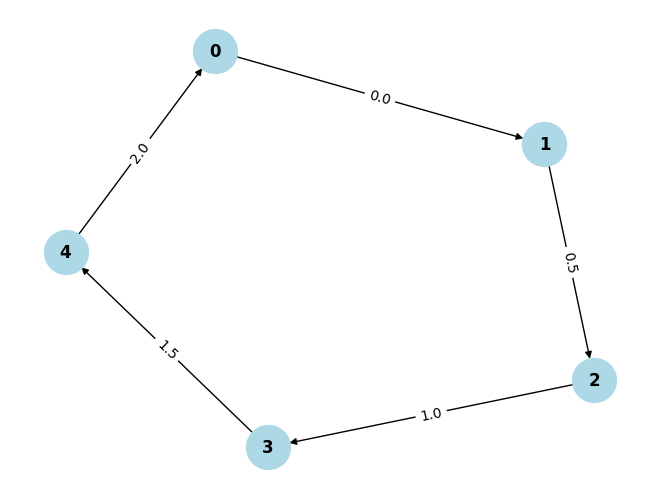

In [3]:
graph = WeightedDiGraph()
for node in range(5):
    graph.add_node(node)
for node in range(5):
    graph.add_edge(node, (node + 1) % 5, node / 2)
graph.draw()

Now the class for weighted undirected graphs, which is very similar to its
[unweighted counterpart](../17_Graphs_1/17_6_classes.ipynb#17.6.2-The-UndirectedGraph-class):
each undirected weighted edge is represented as two directed weighted edges,
and there's no distinction between in-degree, out-degree and degree,
and likewise for neighbours.

In [4]:
# this code is also in m269_ungraph.py


class WeightedUndirectedGraph(WeightedDiGraph):
    """A weighted undirected graph with hashable node objects.

    There's at most one edge between two different nodes.
    There are no edges between a node and itself.
    Edges have weights, which may be integers or floats.
    """

    def add_edge(self, node1: Hashable, node2: Hashable, weight: float) -> None:
        """Add an edge node1-node2 with the given weight to the graph.

        If the edge already exists, set its weight.

        Preconditions: self.has_node(node1) and self.has_node(node2)
        """
        super().add_edge(node1, node2, weight)
        super().add_edge(node2, node1, weight)

    def remove_edge(self, node1: Hashable, node2: Hashable) -> None:
        """Remove edge node1-node2 from the graph.

        If the edge doesn't exist, do nothing.

        Preconditions: self.has_node(node1) and self.has_node(node2)
        """
        super().remove_edge(node1, node2)
        super().remove_edge(node2, node1)

    def edges(self) -> set:
        """Return the graph's edges as a set of triples (node1, node2, weight).

        Postconditions: for every edge A-B,
        the output has either (A, B, w) or (B, A, w) but not both
        """
        all_edges = set()
        for start in self.out:
            for (end, weight) in self.out[start].items():
                if (end, start, weight) not in all_edges:
                    all_edges.add((start, end, weight))
        return all_edges

    def in_neighbours(self, node: Hashable) -> set:
        """Return all nodes that are adjacent to the node.

        Preconditions: self.has_node(node)
        """
        return self.out_neighbours(node)

    def neighbours(self, node: Hashable) -> set:
        """Return all nodes that are adjacent to the node.

        Preconditions: self.has_node(node)
        """
        return self.out_neighbours(node)

    def in_degree(self, node: Hashable) -> int:
        """Return the number of edges attached to the node.

        Preconditions: self.has_node(node)
        """
        return self.out_degree(node)

    def degree(self, node: Hashable) -> int:
        """Return the number of edges attached to the node.

        Preconditions: self.has_node(node)
        """
        return self.out_degree(node)

⟵ [Previous section](18_1_scheduling.ipynb) | [Up](18-introduction.ipynb) | [Next section](18_3_mst.ipynb) ⟶